In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Collecting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#membuat data file ke DataFrame
df = pd.read_csv('/content/drive/MyDrive/Sains Data/Semester 4/PJBL Data Mininh/data.csv')
df

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_kasus,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,318,ORANG,2018
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,112,ORANG,2018
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,124,ORANG,2018
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,219,ORANG,2018
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,107,ORANG,2018
...,...,...,...,...,...,...,...,...
103,104,32,JAWA BARAT,3275,KOTA BEKASI,390,ORANG,2021
104,105,32,JAWA BARAT,3276,KOTA DEPOK,199,ORANG,2021
105,106,32,JAWA BARAT,3277,KOTA CIMAHI,342,ORANG,2021
106,107,32,JAWA BARAT,3278,KOTA TASIKMALAYA,99,ORANG,2021


### Pra-process

In [ ]:
# Menggunakan metode loc untuk mengambil 3 kolom yang diperlukan
df1 = df.loc[:, ['nama_kabupaten_kota', 'tahun', 'jumlah_kasus']]
print(df1)

    nama_kabupaten_kota  tahun  jumlah_kasus
0       KABUPATEN BOGOR   2018           318
1    KABUPATEN SUKABUMI   2018           112
2     KABUPATEN CIANJUR   2018           124
3     KABUPATEN BANDUNG   2018           219
4       KABUPATEN GARUT   2018           107
..                  ...    ...           ...
103         KOTA BEKASI   2021           390
104          KOTA DEPOK   2021           199
105         KOTA CIMAHI   2021           342
106    KOTA TASIKMALAYA   2021            99
107         KOTA BANJAR   2021            40

[108 rows x 3 columns]


In [ ]:
# memisahkan pertahun
df_2018 = df1[df1['tahun'] == 2018]
df_2019 = df1[df1['tahun'] == 2019]
df_2020 = df1[df1['tahun'] == 2020]
df_2021 = df1[df1['tahun'] == 2021]

In [ ]:
# menghapus kolom tahun dan merename kolom 'jumlah_kasus' dengan kasusnya per tahun

# 2018
df_2018 = df_2018.rename(columns={'jumlah_kasus': '2018'})
df_2018 = df_2018.drop('tahun', axis=1)

# 2019
df_2019 = df_2019.rename(columns={'jumlah_kasus': '2019'})
df_2019 = df_2019.drop('tahun', axis=1)

# 2020
df_2020 = df_2020.rename(columns={'jumlah_kasus': '2020'})
df_2020 = df_2020.drop('tahun', axis=1)

# 2021
df_2021 = df_2021.rename(columns={'jumlah_kasus': '2021'})
df_2021 = df_2021.drop('tahun', axis=1)

In [ ]:
# menggabungkan kolom
df_merged = pd.merge(df_2018, df_2019, on='nama_kabupaten_kota')
df_merged = pd.merge(df_merged, df_2020, on='nama_kabupaten_kota')
df_merged = pd.merge(df_merged, df_2021, on='nama_kabupaten_kota')
df_merged

,nama_kabupaten_kota,2018,2019,2020,2021
0,KABUPATEN BOGOR,318,475,417,430
1,KABUPATEN SUKABUMI,112,112,110,117
2,KABUPATEN CIANJUR,124,0,189,111
3,KABUPATEN BANDUNG,219,179,176,225
4,KABUPATEN GARUT,107,0,5,172
5,KABUPATEN TASIKMALAYA,40,77,95,68
6,KABUPATEN CIAMIS,66,95,62,58
7,KABUPATEN KUNINGAN,78,91,48,113
8,KABUPATEN CIREBON,278,257,251,232
9,KABUPATEN MAJALENGKA,92,97,87,123


### Eksplorasi Data Analisis

In [ ]:
# memeriksa dimensi data
import numpy as np
np.shape(df_merged)

(27, 5)

In [ ]:
df_merged.dtypes

nama_kabupaten_kota    object
2018                    int64
2019                    int64
2020                    int64
2021                    int64
dtype: object

In [ ]:
df_merged.isnull().sum()

nama_kabupaten_kota    0
2018                   0
2019                   0
2020                   0
2021                   0
dtype: int64

In [ ]:
df_merged.describe()

,2018,2019,2020,2021
count,27.00000,27.000000,27.000000,27.000000
mean,195.37037,168.037037,176.222222,167.814815
std,207.39597,133.188554,121.702453,113.365317
min,7.00000,0.000000,5.000000,4.000000
25%,74.50000,67.000000,75.000000,83.500000
50%,121.00000,112.000000,134.000000,123.000000
75%,228.50000,251.000000,263.000000,235.500000
max,1054.00000,475.000000,417.000000,430.000000


### Pemodelan Data

#### Klasterisasi 2018 (X) dan 2019 (Y)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mengambil 2 data yang akan diklasterisasi
data = df_merged.loc[:, ['2018', '2019']]
data.head(2)

,2018,2019
0,318,475
1,112,112


In [ ]:
# convert to numpy array
X = data.values
X

array([[ 318,  475],
       [ 112,  112],
       [ 124,    0],
       [ 219,  179],
       [ 107,    0],
       [  40,   77],
       [  66,   95],
       [  78,   91],
       [ 278,  257],
       [  92,   97],
       [  61,  104],
       [ 407,  151],
       [ 230,  339],
       [ 194,  197],
       [  92,  255],
       [ 203,  222],
       [  71,   36],
       [  38,   26],
       [ 446,  443],
       [ 161,   57],
       [1054,  357],
       [  65,  189],
       [ 360,  335],
       [ 227,  247],
       [ 104,   44],
       [ 121,  105],
       [   7,   47]])

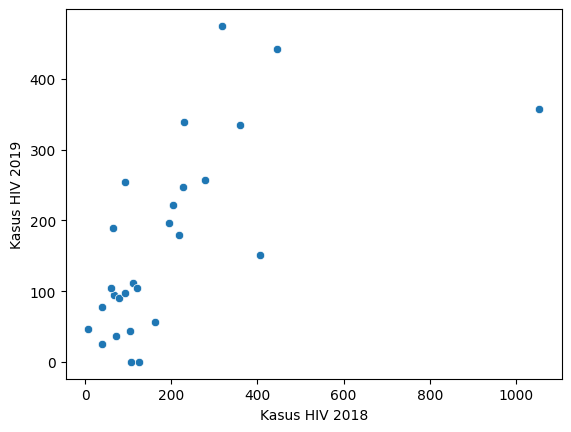

In [ ]:
# visualisasi data dengan library seaborn
sns.scatterplot(x=X[:,0], y=X[:, 1])
plt.xlabel('Kasus HIV 2018')
plt.ylabel('Kasus HIV 2019')
plt.show()

In [ ]:
# kalkulasi WCSS
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

In [ ]:
# implementasi kmeans

def kmeans(X, k):
  diff = 1
  cluster = np.zeros(X.shape[0])
  centroids = data.sample(n=k).values
  while diff:
    # untuk setiap pengamatan
    for i, row in enumerate(X):
      mn_dist = float('inf')
        # dist titik dari semua centroid
      for idx, centroid in enumerate(centroids):
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
        # store closest centroid
        if mn_dist > d:
          mn_dist = d
          cluster[i] = idx
    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
    # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
  return centroids, cluster

In [ ]:
# mencari K value dengan metode Elbow

cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

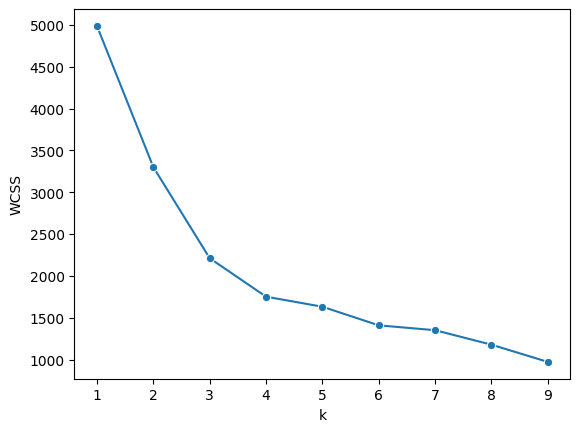

In [ ]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# membuat klaster
k = 3
centroids, cluster = kmeans(X, k)

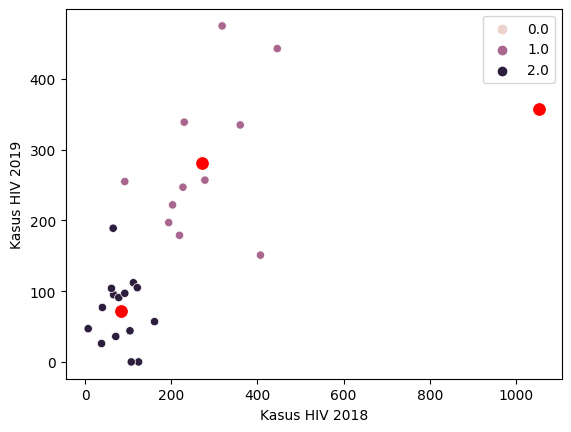

In [ ]:
# Visualisasi Klaster
sns.scatterplot(x=X[:,0], y=X[:, 1], hue=cluster)
sns.scatterplot(x=centroids[:,0], y=centroids[:, 1], s=100, color='red')
plt.xlabel('Kasus HIV 2018')
plt.ylabel('Kasus HIV 2019')
plt.show()

In [ ]:
# hasil klasterisasi pada tahun 2018
# 0.0 = HIV rendah, 1.0 = HIV sedang, 2.0 = HIV tinggi
df_merged['cluster'] = cluster
df_merged

,nama_kabupaten_kota,2018,2019,2020,2021,cluster
0,KABUPATEN BOGOR,318,475,417,430,1.0
1,KABUPATEN SUKABUMI,112,112,110,117,2.0
2,KABUPATEN CIANJUR,124,0,189,111,2.0
3,KABUPATEN BANDUNG,219,179,176,225,1.0
4,KABUPATEN GARUT,107,0,5,172,2.0
5,KABUPATEN TASIKMALAYA,40,77,95,68,2.0
6,KABUPATEN CIAMIS,66,95,62,58,2.0
7,KABUPATEN KUNINGAN,78,91,48,113,2.0
8,KABUPATEN CIREBON,278,257,251,232,1.0
9,KABUPATEN MAJALENGKA,92,97,87,123,2.0


In [ ]:
centroids

array([[1054.        ,  357.        ],
       [ 270.36363636,  281.81818182],
       [  83.13333333,   72.        ]])

### Evaluasi Performa

In [ ]:
def davies_bouldin_index(X, clusters):
    num_clusters = len(np.unique(clusters))
    cluster_centers = []
    for k in range(num_clusters):
        cluster_points = X[clusters == k]
        cluster_center = np.mean(cluster_points, axis=0)
        cluster_centers.append(cluster_center)
    db = 0
    for i in range(num_clusters):
        for j in range(num_clusters):
            if i != j:
                s_i = np.mean([np.linalg.norm(X[p] - cluster_centers[i]) for p in range(len(X)) if clusters[p] == i])
                s_j = np.mean([np.linalg.norm(X[q] - cluster_centers[j]) for q in range(len(X)) if clusters[q] == j])
                m_ij = np.linalg.norm(cluster_centers[i] - cluster_centers[j])
                db += (s_i + s_j) / m_ij
    return db / num_clusters

# Contoh penggunaan
davies_bouldin_score = davies_bouldin_index(X, cluster)
print("Davies-Bouldin Index:", davies_bouldin_score)

Davies-Bouldin Index: 0.5719518067907118


In [ ]:
def silhouette_coefficient(X, clusters):
    num_samples = len(X)
    s = 0
    for i in range(num_samples):
        cluster_i = clusters[i]
        cluster_i_samples = X[clusters == cluster_i]
        a = np.mean([np.linalg.norm(X[i] - sample) for sample in cluster_i_samples if sample is not X[i]])

        b_values = []
        unique_clusters = np.unique(clusters)
        for k in unique_clusters:
            if k != cluster_i:
                cluster_k_samples = X[clusters == k]
                b = np.mean([np.linalg.norm(X[i] - sample) for sample in cluster_k_samples])
                b_values.append(b)

        if len(b_values) > 0:
            b = np.min(b_values)
            s += (b - a) / max(a, b)

    if num_samples > 0:
        return s / num_samples
    else:
        return 0.0

# Example usage
silhouette_score = silhouette_coefficient(X, cluster)
print("Silhouette Coefficient:", silhouette_score)

Silhouette Coefficient: 0.6022273207953531


### 2020 (X) dan 2021 (Y)

In [ ]:
# mengambil 2 data yang akan diklasterisasi
data = df_merged.loc[:, ['2020', '2021']]
data.head(2)

,2020,2021
0,417,430
1,110,117


In [ ]:
# convert to numpy array
X = data.values
X

array([[417, 430],
       [110, 117],
       [189, 111],
       [176, 225],
       [  5, 172],
       [ 95,  68],
       [ 62,  58],
       [ 48, 113],
       [251, 232],
       [ 87, 123],
       [100, 120],
       [275, 113],
       [247, 222],
       [234, 130],
       [315, 244],
       [134, 239],
       [ 67,  67],
       [ 16,   4],
       [364, 333],
       [ 41,  43],
       [ 82,  43],
       [342, 254],
       [322, 390],
       [220, 199],
       [361, 342],
       [130,  99],
       [ 68,  40]])

In [ ]:
# mencari K value dengan metode Elbow

cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

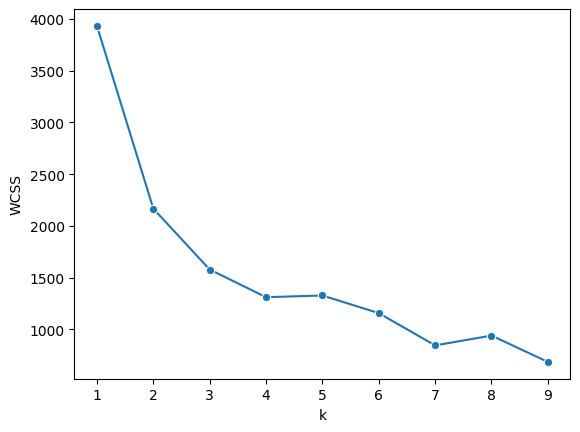

In [ ]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# membuat klaster
k = 2
centroids, cluster = kmeans(X, k)

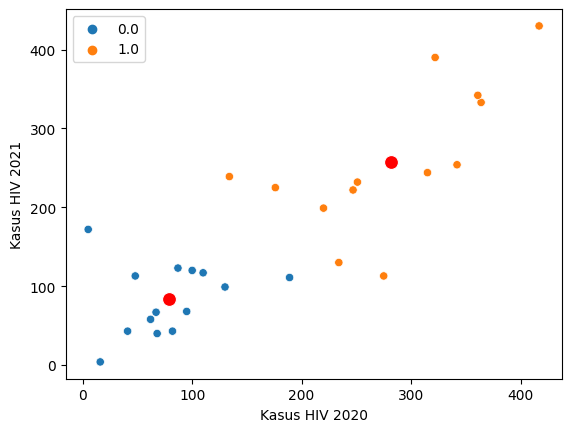

In [ ]:
# Visualisasi Klaster
sns.scatterplot(x=X[:,0], y=X[:, 1], hue=cluster)
sns.scatterplot(x=centroids[:,0], y=centroids[:, 1], s=100, color='red')
plt.xlabel('Kasus HIV 2020')
plt.ylabel('Kasus HIV 2021')
plt.show()

In [ ]:
# hasil klasterisasi pada tahun 2020
# 0.0 = HIV rendah, 1.0 = HIV tinggi
df_merged['cluster'] = cluster
df_merged

,nama_kabupaten_kota,2018,2019,2020,2021,cluster
0,KABUPATEN BOGOR,318,475,417,430,1.0
1,KABUPATEN SUKABUMI,112,112,110,117,0.0
2,KABUPATEN CIANJUR,124,0,189,111,0.0
3,KABUPATEN BANDUNG,219,179,176,225,1.0
4,KABUPATEN GARUT,107,0,5,172,0.0
5,KABUPATEN TASIKMALAYA,40,77,95,68,0.0
6,KABUPATEN CIAMIS,66,95,62,58,0.0
7,KABUPATEN KUNINGAN,78,91,48,113,0.0
8,KABUPATEN CIREBON,278,257,251,232,1.0
9,KABUPATEN MAJALENGKA,92,97,87,123,0.0


In [ ]:
centroids

array([[ 78.57142857,  84.14285714],
       [281.38461538, 257.92307692]])

In [ ]:
def davies_bouldin_index(X, clusters):
    num_clusters = len(np.unique(clusters))
    cluster_centers = []
    for k in range(num_clusters):
        cluster_points = X[clusters == k]
        cluster_center = np.mean(cluster_points, axis=0)
        cluster_centers.append(cluster_center)
    db = 0
    for i in range(num_clusters):
        for j in range(num_clusters):
            if i != j:
                s_i = np.mean([np.linalg.norm(X[p] - cluster_centers[i]) for p in range(len(X)) if clusters[p] == i])
                s_j = np.mean([np.linalg.norm(X[q] - cluster_centers[j]) for q in range(len(X)) if clusters[q] == j])
                m_ij = np.linalg.norm(cluster_centers[i] - cluster_centers[j])
                db += (s_i + s_j) / m_ij
    return db / num_clusters

# Contoh penggunaan
davies_bouldin_score = davies_bouldin_index(X, cluster)
print("Davies-Bouldin Index:", davies_bouldin_score)

Davies-Bouldin Index: 0.6081815042659908


In [ ]:
def silhouette_coefficient(X, clusters):
    num_samples = len(X)
    s = 0
    for i in range(num_samples):
        cluster_i = clusters[i]
        cluster_i_samples = X[clusters == cluster_i]
        a = np.mean([np.linalg.norm(X[i] - sample) for sample in cluster_i_samples if sample is not X[i]])

        b_values = []
        unique_clusters = np.unique(clusters)
        for k in unique_clusters:
            if k != cluster_i:
                cluster_k_samples = X[clusters == k]
                b = np.mean([np.linalg.norm(X[i] - sample) for sample in cluster_k_samples])
                b_values.append(b)

        if len(b_values) > 0:
            b = np.min(b_values)
            s += (b - a) / max(a, b)

    if num_samples > 0:
        return s / num_samples
    else:
        return 0.0

# Example usage
silhouette_score = silhouette_coefficient(X, cluster)
print("Silhouette Coefficient:", silhouette_score)

Silhouette Coefficient: 0.5781416778253102
